## Лабораторная работа №9. Задание 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

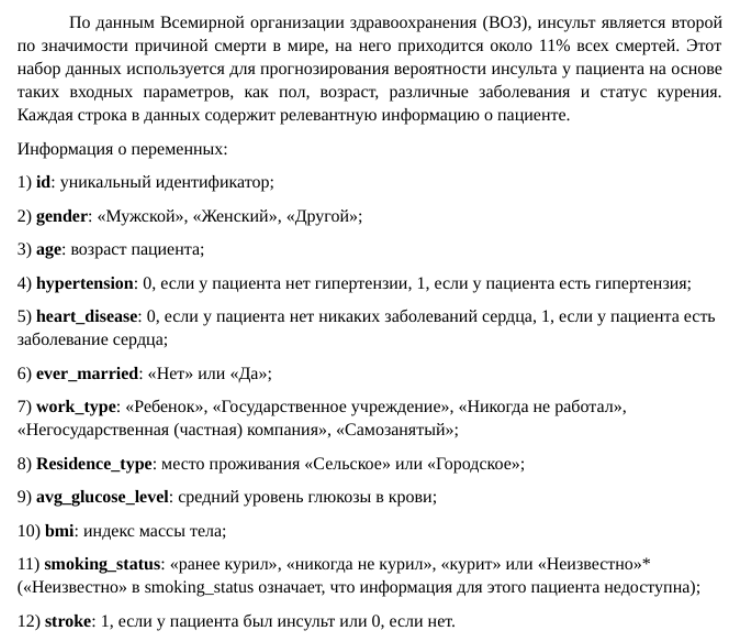
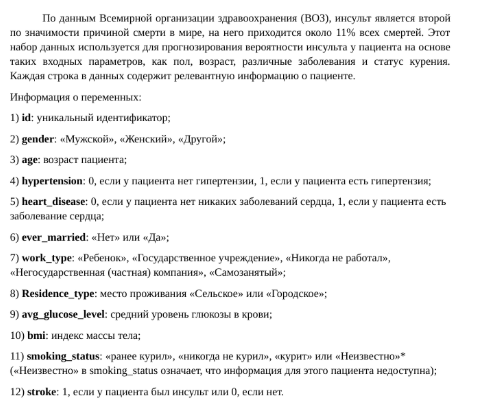

In [3]:
df = pd.read_csv("../data/lab9/healthcare-dataset-stroke-data.csv", sep=",")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Исследовать влияние возраста человека на (age) на индекс массы тела (bmi).

1.1 Подготовка данных

In [4]:
age_bmi_data = df[['age', 'bmi']].copy()

age_bmi_data = age_bmi_data.dropna()

display(age_bmi_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4909 non-null   float64
 1   bmi     4909 non-null   float64
dtypes: float64(2)
memory usage: 115.1 KB


None

1.2 Визуализация данных

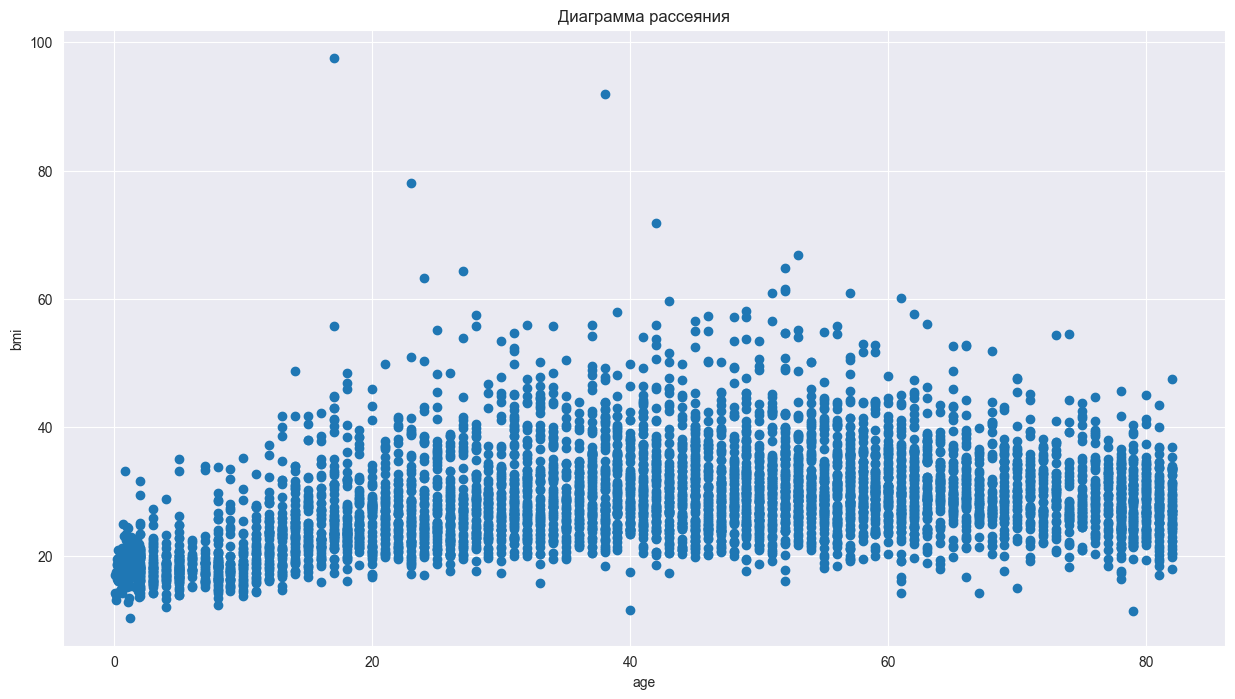

In [5]:
plt.figure(figsize=(15, 8))
plt.scatter(data=age_bmi_data, x='age', y='bmi')
plt.title("Диаграмма рассеяния")
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

1.3 Описательные статистики исходных данных

In [6]:
age_bmi_data.describe()

,age,bmi
count,4909.000000,4909.000000
mean,42.865374,28.893237
std,22.555115,7.854067
min,0.080000,10.300000
25%,25.000000,23.500000
50%,44.000000,28.100000
75%,60.000000,33.100000
max,82.000000,97.600000


1.4 Проверка данных на нормальность

In [7]:
for col in ['age', 'bmi']:
    l = age_bmi_data[col].mean()
    std = age_bmi_data[col].std()

    ks_stat, ks_p_value = stats.kstest(age_bmi_data[col], 'norm', args=(l, std))

print(f"Статистика = {ks_stat}, p_value = {ks_p_value}")
print("По критерию Колмогорова-Смирнова опровергаем гипотезу H0 о том, что исходные данные имеют нормальное распределение")

Статистика = 0.05878812153078805, p_value = 3.444186633707998e-15
По критерию Колмогорова-Смирнова опровергаем гипотезу H0 о том, что исходные данные имеют нормальное распределение


1.5 Поиск выбросов и их удаление

In [8]:
Q1 = age_bmi_data['bmi'].quantile(0.25)
Q3 = age_bmi_data['bmi'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

cleaned_age_bmi_data = age_bmi_data[(age_bmi_data['bmi'] >= lower) & (age_bmi_data['bmi'] <= upper)]

1.6 Корреляционный анализ

In [9]:
pearson_r, pearson_p_value = stats.pearsonr(cleaned_age_bmi_data['age'], cleaned_age_bmi_data['bmi'])

print(f"Коэффициент Пирсона r = {pearson_r}, p-value = {pearson_p_value}")

print("Принимаем гипотезу H0 о том, что линейная связь между age и bmi существует")

Коэффициент Пирсона r = 0.38454618756724046, p-value = 6.126384739187243e-169
Принимаем гипотезу H0 о том, что линейная связь между age и bmi существует


1.7 Результаты линейной регрессионной модели на основе обычного метода наименьших квадратов

In [10]:
ols = smf.ols('bmi ~ age', data=cleaned_age_bmi_data).fit()
display(ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     832.5
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          6.13e-169
Time:                        17:30:51   Log-Likelihood:                -15653.
No. Observations:                4799   AIC:                         3.131e+04
Df Residuals:                    4797   BIC:                         3.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3552      0.195    120.054      0.000      22.974      23.737
age            0.1158      0.004     28.852      0.000       0.108       0.124
==============================================================================
Omnibus:                      275.000   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.189
Skew:                           0.632   Prob(JB):                     6.61e-71
Kurtosis:                       3.135   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.8 Построение полиномиального уравнения регрессии

In [14]:
x = cleaned_age_bmi_data[['age']]
y = cleaned_age_bmi_data['bmi']

polynom = PolynomialFeatures(degree=2, include_bias=False)
x_polynom = polynom.fit_transform(x)

print(x_polynom)

polynom_model = LinearRegression()
polynom_model.fit(x_polynom, y)

coefficients = polynom_model.coef_
intercept = polynom_model.intercept_


print(f"Свободный член модели - {intercept}")
print(f"Коэффициенты модели - {coefficients}")

cleaned_age_bmi_data_copy = cleaned_age_bmi_data.copy()
cleaned_age_bmi_data_copy['age_squared'] = cleaned_age_bmi_data_copy['age']**2

ols_poly_formula = smf.ols('bmi ~ age + age_squared', data=cleaned_age_bmi_data_copy).fit()
display(ols_poly_formula.summary())


PolynomialFeatures(include_bias=False)
[[  67. 4489.]
 [  80. 6400.]
 [  49. 2401.]
 ...
 [  35. 1225.]
 [  51. 2601.]
 [  44. 1936.]]
Свободный член модели - 17.452899887303857
Коэффициенты модели - [ 0.52220317 -0.0048944 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     937.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:31:09   Log-Likelihood:                -15245.
No. Observations:                4799   AIC:                         3.050e+04
Df Residuals:                    4796   BIC:                         3.052e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.4529      0.267     65.450      0.000      16.930      17.976
age             0.5222      0.014     36.986      0.000       0.495       0.550
age_squared    -0.0049      0.000    -29.821      0.000      -0.005      -0.005
==============================================================================
Omnibus:                      259.488   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.899
Skew:                           0.599   Prob(JB):                     2.78e-66
Kurtosis:                       3.277   Cond. No.                     9.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.9 Сравнение моделей на основе квадрата отклонения

In [12]:
ols_predict = ols.predict(cleaned_age_bmi_data)
ols_mse = mean_squared_error(y, ols_predict)

polynom_predict = polynom_model.predict(polynom.transform(x))
polynom_mse = mean_squared_error(y, polynom_predict)

mse = pd.DataFrame({
    'Модель': ['Линейная', 'Полиномиальная'],
    'MSE': [ols_mse, polynom_mse],
})

mse

,Модель,MSE
0,Линейная,39.873411
1,Полиномиальная,33.636593


1.10 График уравнений линейной и полиномиальной регрессий совместно с диаграммой рассеяния

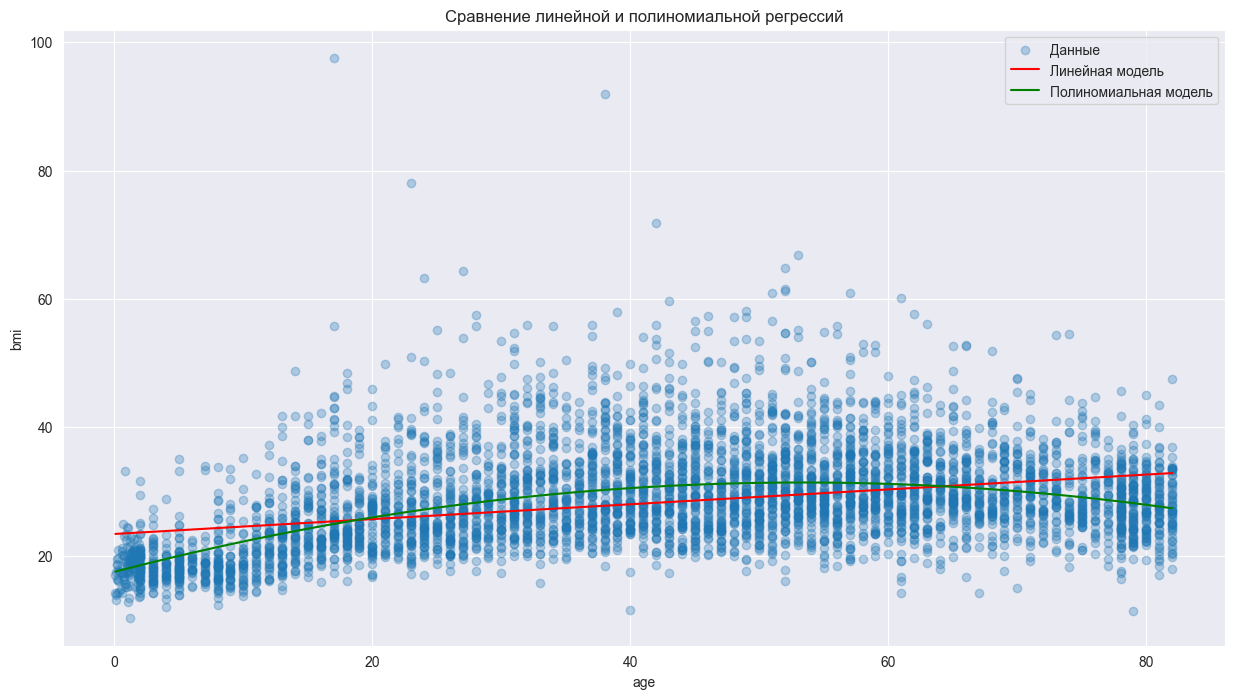

In [13]:
age_grid = np.linspace(cleaned_age_bmi_data['age'].min(), cleaned_age_bmi_data['age'].max(), 200)
age_grid_df = pd.DataFrame({'age': age_grid})

ols_line = ols.predict(age_grid_df)
poly_line = polynom_model.predict(polynom.transform(age_grid_df[['age']]))

plt.figure(figsize=(15, 8))
plt.scatter(data=age_bmi_data, x='age', y='bmi', alpha=0.3, label='Данные')
plt.plot(age_grid, ols_line, color='red', label='Линейная модель')
plt.plot(age_grid, poly_line, color='green', label='Полиномиальная модель')
plt.title('Сравнение линейной и полиномиальной регрессий')
plt.xlabel('age')
plt.ylabel('bmi')
plt.legend()
plt.show()